In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import cv2
import os

In [6]:
train_def_images_path = "../data/casting_data/train/def_front/"
train_ok_images_path = "../data/casting_data/train/ok_front/"


## store the images

In [8]:
# Read all images from the directory
def load_data(path):
    # List to stroe image data
    data = []
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):
            img_path = os.path.join(path, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                data.append(image)
            else:
                print(f"Failed to read the image: {img_path}")

    # Convert the list to a numpy array
    data_array = np.array(data)
    print(f"Total images loaded: {data_array.shape[0]}")
    return data_array

### train images_def

In [9]:
train_def_image_data = load_data(train_def_images_path)

Total images loaded: 3758


### train images_ok

In [5]:
train_ok_image_data = load_data(train_ok_images_path)

Total images loaded: 2875


In [6]:
# Function to display the first 9 images in a 3x3 grid
def display_images(images, num_images=9, title ="title"):
    plt.figure(figsize=(10,10))
    axis_size = int(num_images**(1/2))
    for i in range(num_images):
        plt.subplot(axis_size, axis_size, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()


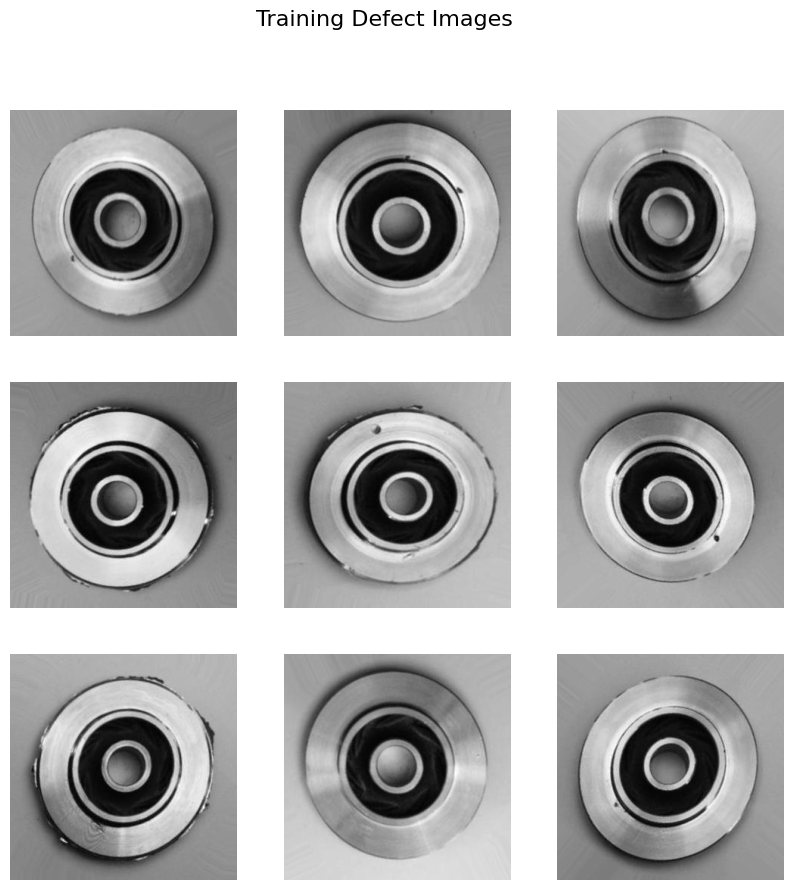

In [7]:
display_images(train_def_image_data, 9, "Training Defect Images")

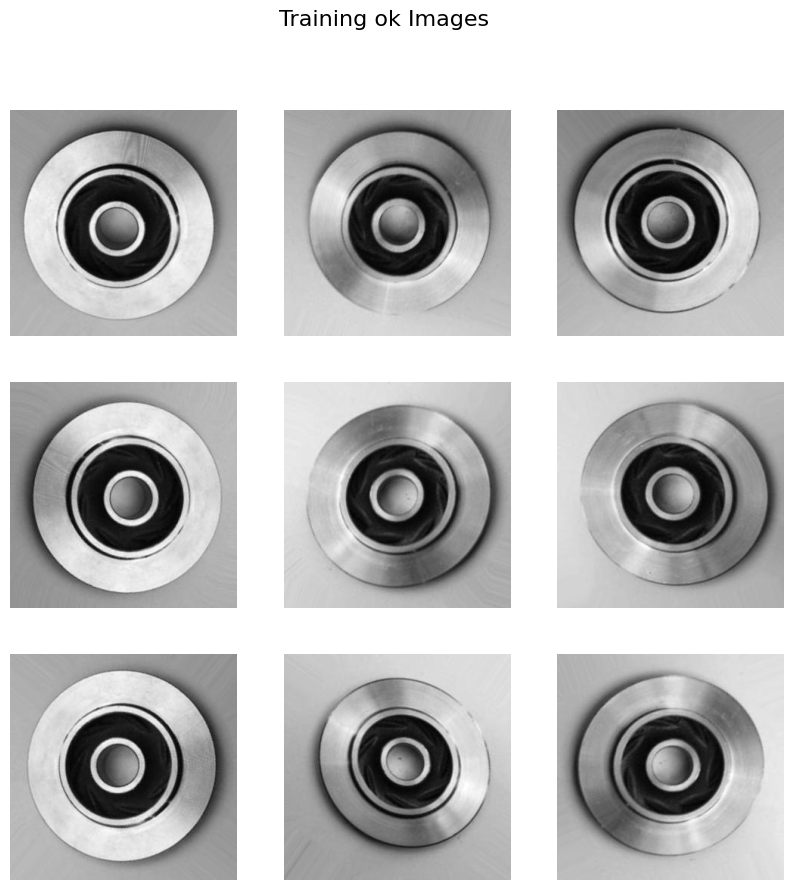

In [8]:
display_images(train_ok_image_data, 9, "Training ok Images")

## images info

In [9]:
train_def_image_data[0].shape

(300, 300)

In [10]:
# Combine the datasets along the first axis
data = np.concatenate((train_def_image_data, train_ok_image_data), axis=0)
print(f'the shape before reshape',data.shape)
# Reshape the dataset to (6633, 90000)
data_flat = data.reshape(data.shape[0], -1)
print(f'the shape after reshape',data_flat.shape)

the shape before reshape (6633, 300, 300)
the shape after reshape (6633, 90000)


In [11]:
# get label
# Total number of elements
total_elements = data.shape[0]

# Number of ones
num_ones = train_def_image_data.shape[0]

# Create an array of zeros
label = np.zeros(total_elements, dtype=int)

# Set the first `num_ones` elements to 1
label[:num_ones] = 1

label

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
df_flat_data = pd.DataFrame(data_flat)
df_flat_data["label"] =  label
df_flat_data

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,label
0,159,159,159,158,157,156,155,154,158,159,...,135,135,135,135,135,135,135,135,135,1
1,129,129,129,129,129,129,129,129,130,130,...,164,164,163,163,163,164,164,164,164,1
2,192,192,192,191,191,190,190,190,188,188,...,152,153,154,155,155,155,155,155,155,1
3,131,131,131,131,131,131,131,131,132,131,...,147,146,146,146,145,146,146,146,146,1
4,155,155,155,155,155,155,155,155,156,156,...,193,193,193,193,193,194,194,194,194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,183,183,182,181,180,179,179,178,183,183,...,144,144,145,145,145,146,146,146,146,0
6629,196,195,195,194,194,193,193,192,191,191,...,142,142,142,142,142,142,142,142,142,0
6630,234,233,231,230,229,228,228,228,229,229,...,174,172,170,171,172,175,175,175,175,0
6631,166,166,166,165,165,164,164,164,166,169,...,154,152,151,150,150,151,151,151,151,0


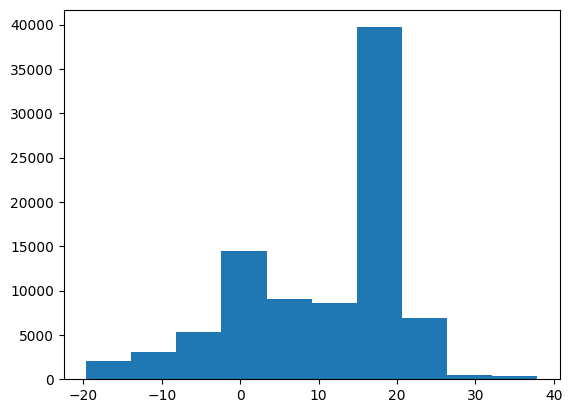

In [56]:
mean_diff = df_flat_data.groupby(label).mean()
mean_diff = mean_diff.iloc[0,:]-mean_diff.iloc[1,:]
plt.hist(mean_diff)
plt.show()

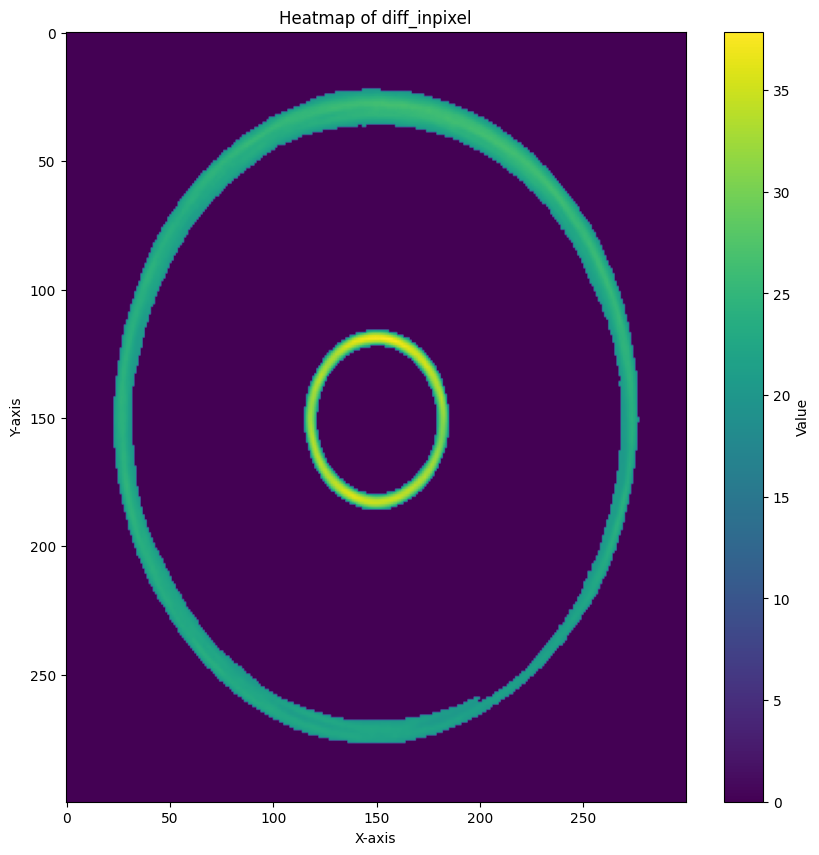

In [58]:
mean_diff[mean_diff < 20] = 0
diff_pixel = mean_diff.values[:90000].reshape((300,300))
# Plot heatmap
plt.figure(figsize=(10, 10))
plt.imshow(diff_pixel, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Heatmap of diff_inpixel')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## TSNE

In [ ]:
# TSNE model
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(data_flat)

In [16]:
result.shape

(6633, 2)

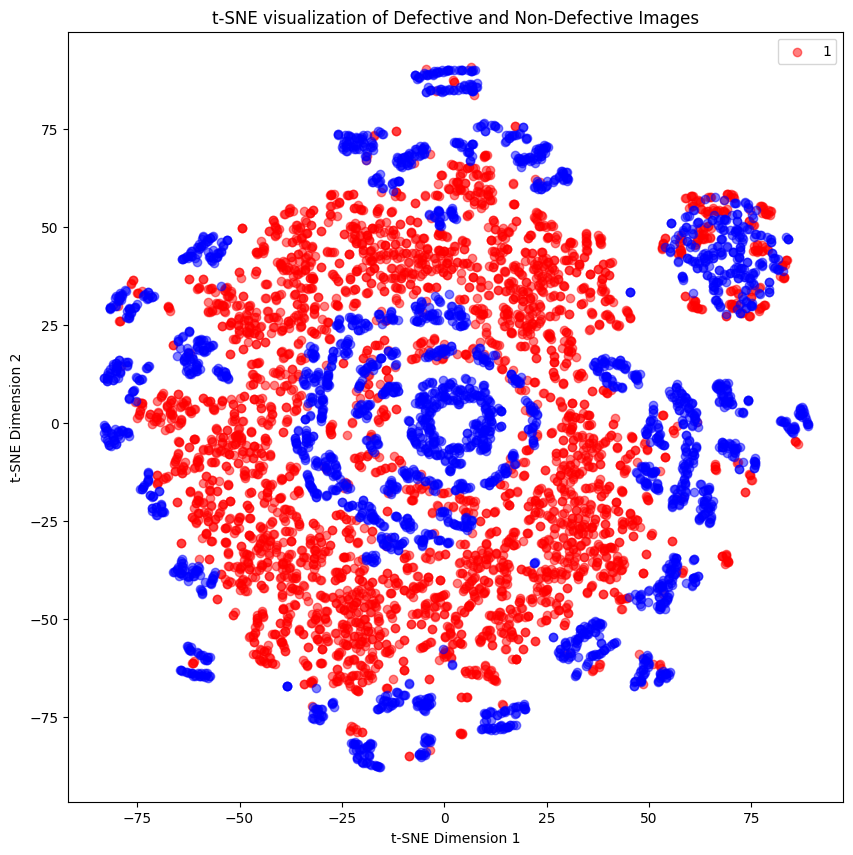

In [19]:
def plot_embedding(data, label):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    colors = {1: 'red', 0: 'blue'}

    for i, label in enumerate(label):
        ax.scatter(data[i, 0], data[i, 1], c=colors[label], label=label if i == 0 else "", alpha=0.5)

    ax.set_title('t-SNE visualization of Defective and Non-Defective Images')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    plt.legend(loc='best')
    return fig

fig = plot_embedding(result, label)
plt.show(fig)

In [20]:
result

array([[ 28.266289  , -25.23833   ],
       [-15.854347  ,   0.36707905],
       [ 25.653591  ,  22.954718  ],
       ...,
       [ 55.52249   , -41.290142  ],
       [ -1.0159645 ,  -8.038851  ],
       [-30.032175  ,   1.1752738 ]], dtype=float32)